In [131]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_data = pd.merge(ride_data_df, city_data_df, on="city")

# Display the data table for preview
merge_data.head()

total_drivers = merge_data.sum()['driver_count']
total_drivers


68709

## Bubble Plot of Ride Sharing Data

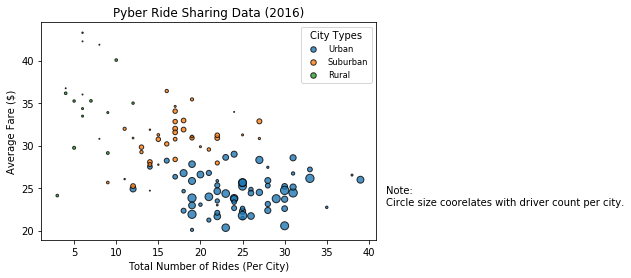

In [132]:
# Obtain the x and y coordinates for each of the three city types

urban_cities = merge_data[merge_data['type'] == 'Urban']
suburban_cities = merge_data[merge_data['type'] == "Suburban"]
rural_cities = merge_data[merge_data['type'] == "Rural"]

urban_ride_count = urban_cities.groupby(['city']).count()['ride_id']
urban_avg_fare = urban_cities.groupby(['city']).mean()['fare']
urban_driver_count = urban_cities.groupby(['city']).mean()['driver_count']
urban_total_fare = urban_cities.sum()['fare']
urban_total_drivers = urban_cities.sum()['driver_count']

suburban_ride_count = suburban_cities.groupby(['city']).count()['ride_id']
suburban_avg_fare = suburban_cities.groupby(['city']).mean()['fare']
suburban_driver_count = suburban_cities.groupby(['city']).mean()['driver_count']
suburban_total_fare = suburban_cities.sum()['fare']
suburban_total_drivers = suburban_cities.sum()['driver_count']

rural_ride_count = rural_cities.groupby(['city']).count()['ride_id']
rural_avg_fare = rural_cities.groupby(['city']).mean()['fare']
rural_driver_count = rural_cities.groupby(['city']).mean()['driver_count']
rural_total_fare = rural_cities.sum()['fare']
rural_total_drivers = rural_cities.sum()['driver_count']


# Build the scatter plots for each city types
plt.scatter(urban_ride_count, urban_avg_fare, s = urban_driver_count,
           edgecolor = 'black', linewidths = 1, marker = 'o', alpha = 0.8, label = 'Urban')
plt.scatter(suburban_ride_count, suburban_avg_fare, s = suburban_driver_count,
           edgecolor = 'black', linewidths = 1, marker = 'o', alpha = 0.8, label = 'Suburban')
plt.scatter(rural_ride_count, rural_avg_fare, s = rural_driver_count,
           edgecolor = 'black', linewidths = 1, marker = 'o', alpha = 0.8, label = 'Rural')

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded",
                 numpoints=1, scatterpoints=1,
                 loc="best", title="City Types",
                 labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 23,'Note:\nCircle size coorelates with driver count per city.')
# Save Figure
plt.savefig("bubbleplot.png")


In [4]:
# Show plot
plt.show()

In [101]:
suburban_total_fare

19356.329999999994

## Total Fares by City Type

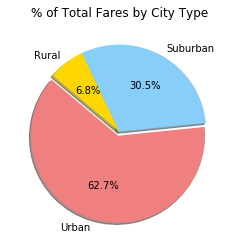

<Figure size 432x288 with 0 Axes>

In [136]:
total_fare = merge_data.sum()['fare']

# Calculate Type Percents
percent_urban_fares = urban_total_fare/(total_fare)*100

percent_suburban_fares = suburban_total_fare/(total_fare)*100

percent_rural_fares = rural_total_fare/(total_fare)*100

percents = [percent_urban_fares, percent_suburban_fares, percent_rural_fares]

types = ["Urban", "Suburban", "Rural"]
explode = (0.05,0,0)
colors = ["lightcoral", "lightskyblue", "gold"]

# Build Pie Chart
plt.pie(percents, explode=explode, labels=types, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.show()
# Save Figure
plt.savefig("Fares_by_City_Type.png")

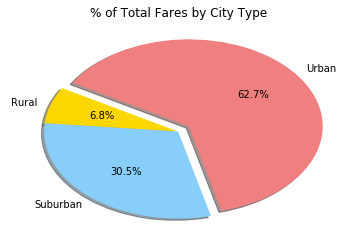

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

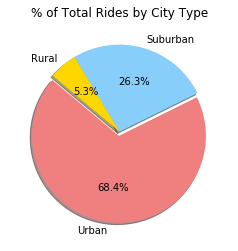

<Figure size 432x288 with 0 Axes>

In [137]:
# Calculate Type Percents
percent_urban_rides = len(urban_cities)/len(merge_data)*100

percent_suburban_rides = len(suburban_cities)/len(merge_data)*100

percent_rural_rides = len(rural_cities)/len(merge_data)*100

percents = [percent_urban_rides, percent_suburban_rides, percent_rural_rides]

types = ["Urban", "Suburban", "Rural"]
explode = (0.05,0,0)
colors = ["lightcoral", "lightskyblue", "gold"]

# Build Pie Chart
plt.pie(percents, explode=explode, labels=types, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.show()
# Save Figure
plt.savefig("Rides_by_city_type.png")

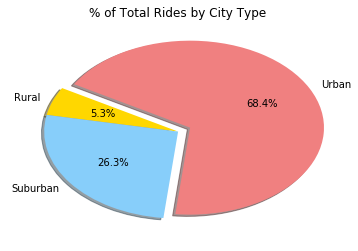

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

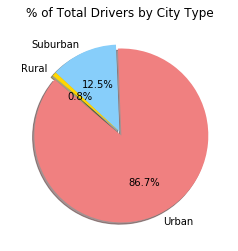

<Figure size 432x288 with 0 Axes>

In [138]:

# Calculate Type Percents
percent_urban_drivers = urban_total_drivers/total_drivers*100

percent_suburban_drivers = suburban_total_drivers/total_drivers*100

percent_rural_drivers = rural_total_drivers/total_drivers*100

percents = [percent_urban_drivers, percent_suburban_drivers, percent_rural_drivers]

#Build Pie Chart 
types = ["Urban", "Suburban", "Rural"]
explode = (0.05,0,0)
colors = ["lightcoral", "lightskyblue", "gold"]

plt.pie(percents, explode=explode, labels=types, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.show()
# # Save Figure
plt.savefig("drivers_by_city_type.png")

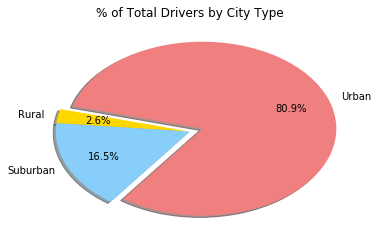

In [6]:
# Show Figure
plt.show()